In [119]:
import pandas as pd
import yfinance as yf
import numpy as np

In [120]:
sensex_symbols = [
    "ASIANPAINT", "AXISBANK", "BAJFINANCE", "BAJAJFINSV", "BHARTIARTL", "DRREDDY",
    "HCLTECH", "HDFCBANK","HINDUNILVR", "ICICIBANK",
    "INDUSINDBK", "INFY", "ITC","JSWSTEEL", "KOTAKBANK", "LT",
    "M&M", "MARUTI", "NESTLEIND", "NTPC", "POWERGRID",
    "RELIANCE", "SBIN", "SUNPHARMA", "TCS", "TATAMOTORS",
    "TATASTEEL", "TECHM","TITAN", "ULTRACEMCO"
]


In [121]:
sensex_symbols = [symbol+'.NS' for symbol in sensex_symbols]

In [122]:
symbols = np.array(sensex_symbols)
print(symbols.size)

30


In [123]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def get_past_prices(symbols):
    today = datetime.today().date()

    # Calculate the dates for 1 month ago, 3 months ago, etc.
    dates = {
        "Current Price": today - timedelta(days=1),
        "1 Month Ago": today - timedelta(days=30),
        "3 Months Ago": today - timedelta(days=90),
        "6 Months Ago": today - timedelta(days=180),
        "1 Year Ago": today - timedelta(days=365),
        "2 Years Ago": today - timedelta(days=730),
        "5 Years Ago": today - timedelta(days=1825),
    }

    # Initialize an empty DataFrame to store the results
    prices_df = pd.DataFrame(index=symbols, columns=dates.keys())

    for symbol in symbols:
        stock_data = yf.Ticker(symbol)
        for label, date in dates.items():
            data = stock_data.history(start=date, end=date + timedelta(days=1))
            if not data.empty:
                prices_df.loc[symbol, label] = data['Close'].values[0]
            else:
                prices_df.loc[symbol, label] = None  # In case the data is not available

    return prices_df

# Example usage

prices_df = get_past_prices(sensex_symbols)
print(prices_df)


              Current Price   1 Month Ago  3 Months Ago  6 Months Ago  \
ASIANPAINT.NS   3103.199951   2934.300049   2875.923828   2957.336182   
AXISBANK.NS          1168.0        1282.5    1164.35144   1095.954224   
BAJFINANCE.NS   6722.200195       6884.25   6792.550293   6664.394043   
BAJAJFINSV.NS   1602.099976   1631.150024   1607.435791   1615.530762   
BHARTIARTL.NS   1449.150024   1457.278931   1366.435181    1119.51123   
DRREDDY.NS      6965.350098   6770.899902   5862.980957   6404.225586   
HCLTECH.NS          1686.75   1565.099976   1343.250977   1631.177246   
HDFCBANK.NS     1637.699951   1642.550049   1492.599976   1401.462402   
HINDUNILVR.NS   2751.050049   2735.300049   2359.512207   2371.000244   
ICICIBANK.NS    1179.449951   1230.556396    1124.81665   1052.241455   
INDUSINDBK.NS   1381.300049   1423.400024   1425.029541   1464.046509   
INFY.NS         1872.199951   1810.849976   1464.148071   1667.452271   
ITC.NS           498.799988    466.549988    433.65

In [124]:
prices_df['1m'] = -(prices_df['1 Month Ago']-prices_df['Current Price'])*100/prices_df['1 Month Ago']
prices_df['3m'] = -(prices_df['3 Months Ago']-prices_df['Current Price'])*100/prices_df['3 Months Ago']
prices_df['6m'] = -(prices_df['6 Months Ago']-prices_df['Current Price'])*100/prices_df['6 Months Ago']
prices_df['1y'] = -(prices_df['1 Year Ago']-prices_df['Current Price'])*100/prices_df['1 Year Ago']
prices_df['2y'] = -(prices_df['2 Years Ago']-prices_df['Current Price'])*100/prices_df['2 Years Ago']
prices_df['5y'] = -(prices_df['5 Years Ago']-prices_df['Current Price'])*100/prices_df['5 Years Ago']

In [125]:
prices_df

,Current Price,1 Month Ago,3 Months Ago,6 Months Ago,1 Year Ago,2 Years Ago,5 Years Ago,1m,3m,6m,1y,2y,5y
ASIANPAINT.NS,3103.199951,2934.300049,2875.923828,2957.336182,3143.741455,3285.218994,1519.061523,5.756054,7.902717,4.932269,-1.289594,-5.540545,104.28402
AXISBANK.NS,1168.0,1282.5,1164.35144,1095.954224,956.311951,739.755981,661.019897,-8.927875,0.313356,6.573794,22.135878,57.889903,76.696648
BAJFINANCE.NS,6722.200195,6884.25,6792.550293,6664.394043,7034.635254,7036.823242,3121.489746,-2.353921,-1.035695,0.867388,-4.441382,-4.471095,115.352307
BAJAJFINSV.NS,1602.099976,1631.150024,1607.435791,1615.530762,1466.874634,1585.333862,686.863892,-1.780955,-0.331946,-0.831354,9.218603,1.057576,133.248537
BHARTIARTL.NS,1449.150024,1457.278931,1366.435181,1119.51123,872.786133,720.259216,343.536377,-0.557814,6.053331,29.444885,66.037242,101.198401,321.833064
DRREDDY.NS,6965.350098,6770.899902,5862.980957,6404.225586,5890.666504,4130.004395,2462.371094,2.871852,18.802195,8.761786,18.243837,68.652365,182.871664
HCLTECH.NS,1686.75,1565.099976,1343.250977,1631.177246,1135.324829,883.318542,461.573669,7.772668,25.572215,3.406911,48.569815,90.956028,265.434623
HDFCBANK.NS,1637.699951,1642.550049,1492.599976,1401.462402,1561.378662,1434.096069,1038.072876,-0.295279,9.72129,16.856503,4.88807,14.197367,57.763486
HINDUNILVR.NS,2751.050049,2735.300049,2359.512207,2371.000244,2522.542725,2544.423584,1722.748047,0.575805,16.594016,16.029092,9.058611,8.120757,59.689634
ICICIBANK.NS,1179.449951,1230.556396,1124.81665,1052.241455,943.87439,831.205322,382.216827,-4.153117,4.857085,12.089288,24.958359,41.896343,208.581378


In [126]:
cols_to_drop = ['1 Month Ago', '3 Months Ago', '6 Months Ago',
       '1 Year Ago', '2 Years Ago', '5 Years Ago']

for col in cols_to_drop:
    prices_df = prices_df.drop(col, axis=1)

In [127]:
prices_df

,Current Price,1m,3m,6m,1y,2y,5y
ASIANPAINT.NS,3103.199951,5.756054,7.902717,4.932269,-1.289594,-5.540545,104.28402
AXISBANK.NS,1168.0,-8.927875,0.313356,6.573794,22.135878,57.889903,76.696648
BAJFINANCE.NS,6722.200195,-2.353921,-1.035695,0.867388,-4.441382,-4.471095,115.352307
BAJAJFINSV.NS,1602.099976,-1.780955,-0.331946,-0.831354,9.218603,1.057576,133.248537
BHARTIARTL.NS,1449.150024,-0.557814,6.053331,29.444885,66.037242,101.198401,321.833064
DRREDDY.NS,6965.350098,2.871852,18.802195,8.761786,18.243837,68.652365,182.871664
HCLTECH.NS,1686.75,7.772668,25.572215,3.406911,48.569815,90.956028,265.434623
HDFCBANK.NS,1637.699951,-0.295279,9.72129,16.856503,4.88807,14.197367,57.763486
HINDUNILVR.NS,2751.050049,0.575805,16.594016,16.029092,9.058611,8.120757,59.689634
ICICIBANK.NS,1179.449951,-4.153117,4.857085,12.089288,24.958359,41.896343,208.581378


In [128]:
df = prices_df

In [129]:
prices_df = prices_df.reset_index()

In [130]:
prices_df.rename(columns = {'index': 'Symbol'}, inplace=True)

In [131]:
prices_df.head()

,Symbol,Current Price,1m,3m,6m,1y,2y,5y
0,ASIANPAINT.NS,3103.199951,5.756054,7.902717,4.932269,-1.289594,-5.540545,104.28402
1,AXISBANK.NS,1168.0,-8.927875,0.313356,6.573794,22.135878,57.889903,76.696648
2,BAJFINANCE.NS,6722.200195,-2.353921,-1.035695,0.867388,-4.441382,-4.471095,115.352307
3,BAJAJFINSV.NS,1602.099976,-1.780955,-0.331946,-0.831354,9.218603,1.057576,133.248537
4,BHARTIARTL.NS,1449.150024,-0.557814,6.053331,29.444885,66.037242,101.198401,321.833064


/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_30867/1631238202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


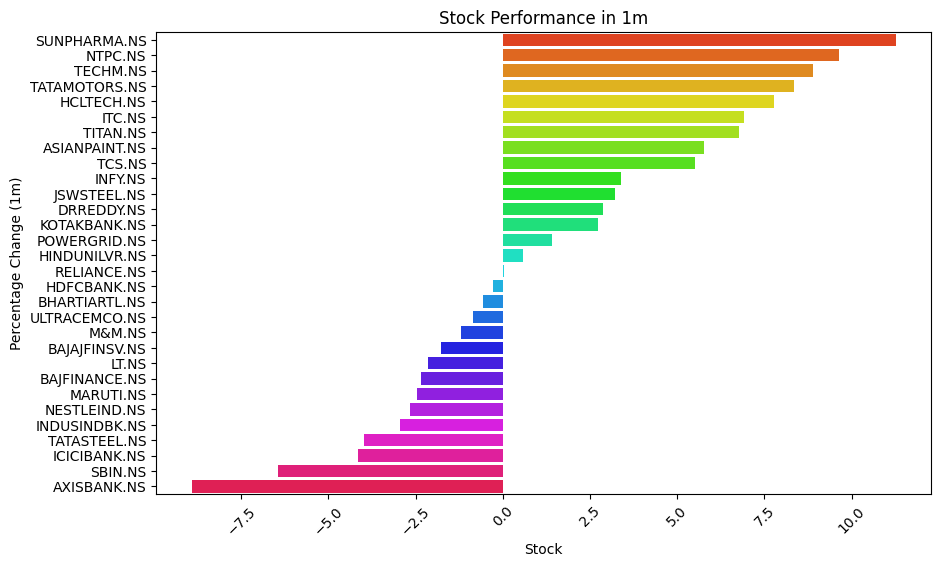

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_30867/1631238202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


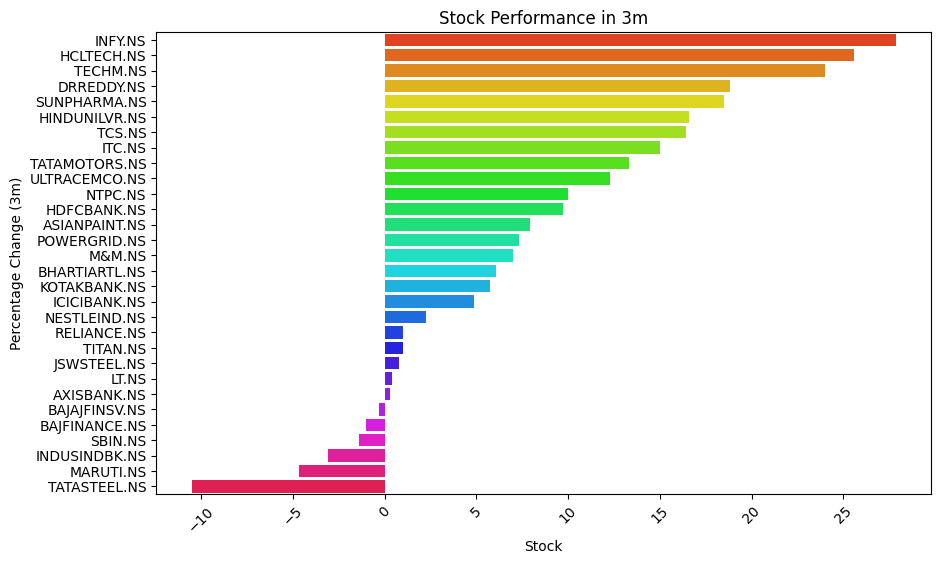

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_30867/1631238202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


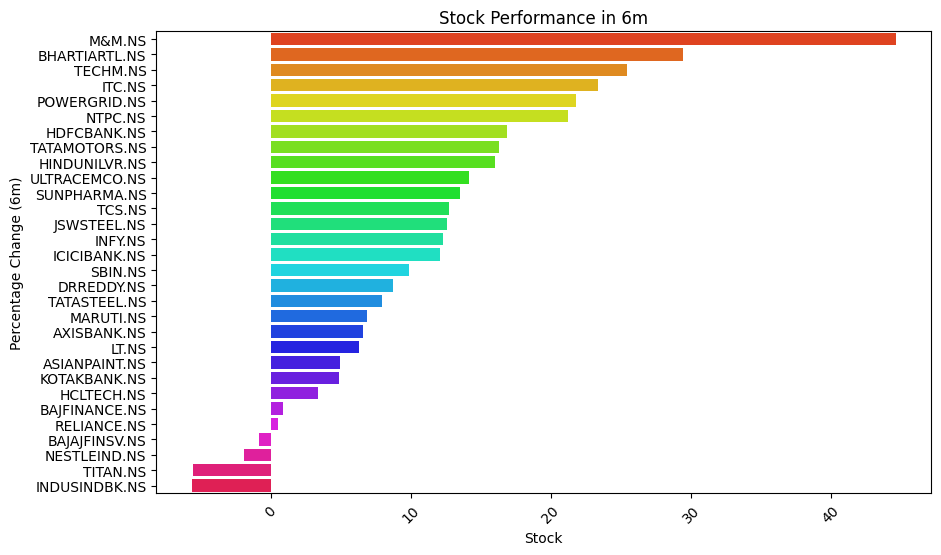

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_30867/1631238202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


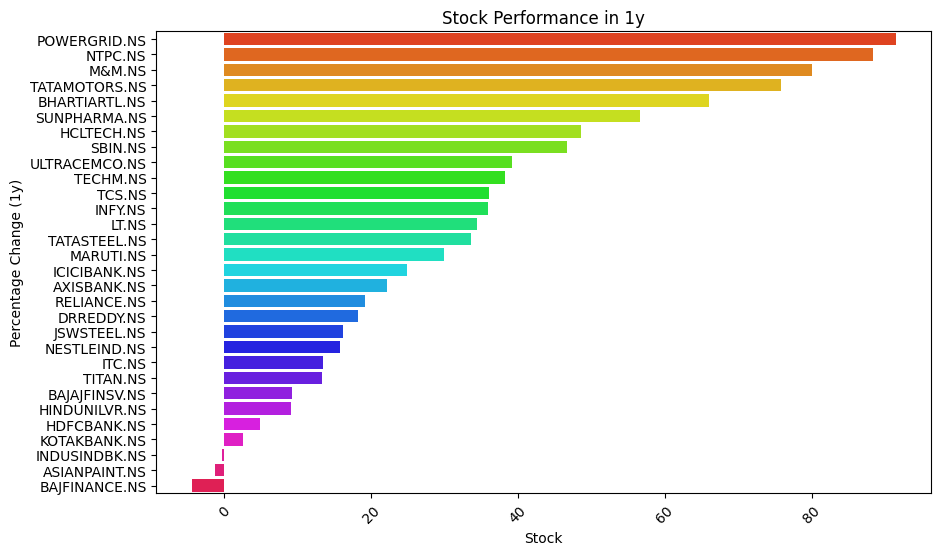

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_30867/1631238202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


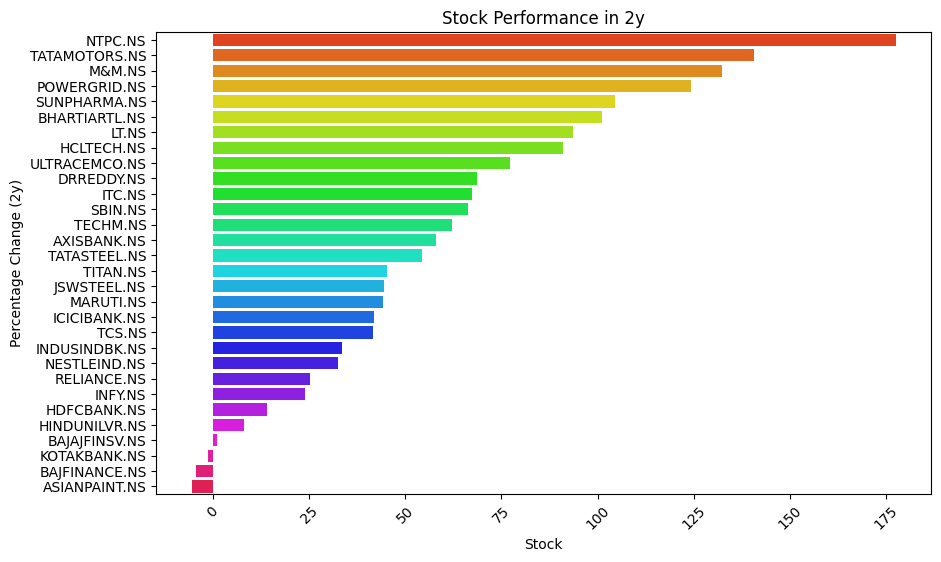

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_30867/1631238202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


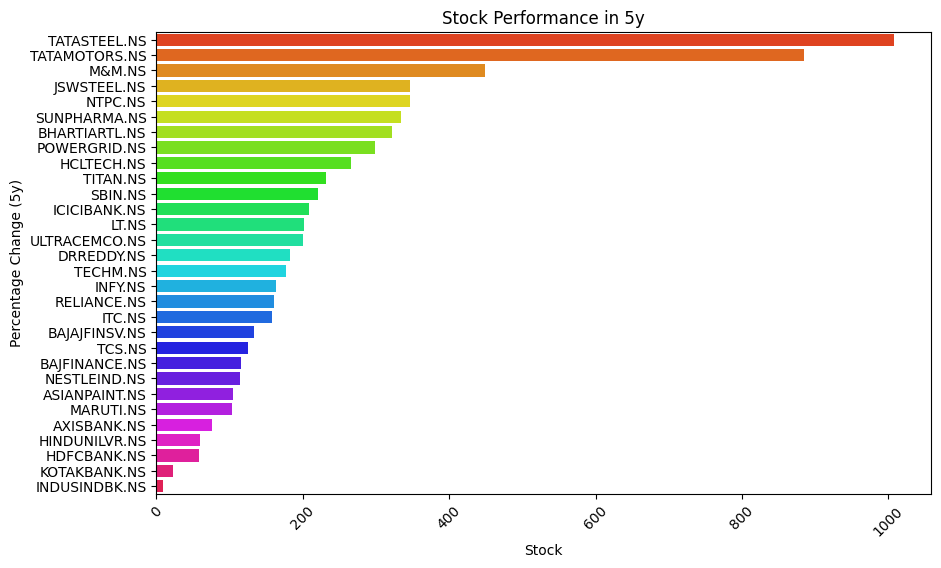

In [132]:
import seaborn as sns

time_period = ['1m', '3m', '6m', '1y', '2y', '5y']

for t in time_period:
    sorted_df = prices_df.sort_values(by=t, ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')
    plt.title(f'Stock Performance in {t}')
    plt.xlabel('Stock')
    plt.ylabel(f'Percentage Change ({t})')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()